## **Introduction: Predicting Diabetes Using Classification**

Diabetes is a chronic disease that affects millions of people worldwide including  a few members in my family, and early detection is crucial for managing and preventing serious complications. With the growing availability of medical data, machine learning can help identify patterns that may indicate whether a person is at risk for diabetes based on key health indicators. In this project, I will develop a classification model to predict whether an individual has diabetes based on a given set of health measurements. This analysis will explore different machine learning techniques to determine the most effective approach for accurate classification.

By analyzing the data and models, I aim to answer the following questions:

1. Which classification model, Decision Tree or Random Forest, performs better in predicting diabetes?  
2. Can we use GridSearchCV to find the best hyperparameter to improve our models performance?  



## **Dataset Overview**
This kaggle dataset isfrome the Pima Indians Diabetes Database, originally from the National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK). It contains medical and demographic information about women of Pima Indian heritage, with the goal of predicting whether an individual has diabetes based on health measurements. The dataset consists of 768 observations with 8 medical features and a binary target variable (Outcome), where 1 indicates diabetes and 0 indicates no diabetes.

The dataset includes 9 key features:

- **Pregnancies**: Number of times the patient has been pregnant.  
- **Glucose**: Plasma glucose concentration (mg/dL).  
- **BloodPressure**: Diastolic blood pressure (mm Hg).  
- **SkinThickness**: Triceps skinfold thickness (mm).  
- **Insulin**: 2-hour serum insulin (μU/mL).  
- **BMI**: Body Mass Index (weight in kg/height in m²).  
- **DiabetesPedigreeFunction**: A function that represents diabetes likelihood based on family history.  
- **Age**: Patient's age in years.  
- **Outcome**: Target variable (0 = No diabetes, 1 = Diabetes).   

Dataset Source: [Prima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)  

## **Importing libraries and loading the data**
- First, we will import libraries necessary for working with our data, such as pandas and numpy.
- We will also import plotting libraries like seaborn and matplotlib.

In [1]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("diabetes.csv")

## **Understanding the data**
Now I will look at the different columns, dtypes, shape of dataframe, and also the balance of between the data.

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.shape

(768, 9)

In [6]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


<Axes: xlabel='Outcome', ylabel='count'>

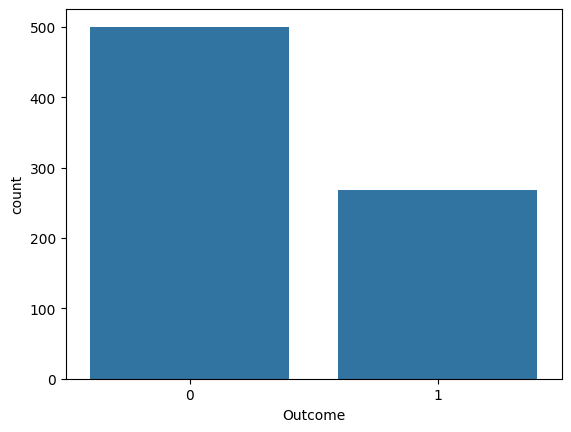

In [7]:
sns.countplot(x="Outcome", data=df)

According to the plot above, this dataset has much more '0' and '1'. This means the data is not very balanced and has more patients who tested negative for diabetes than positve. This is something we will have to keep this in mind later when evaluating our model.

## **Preprocessing the Data**
Before performing any analysis, we need to ensure the data is clean and usable. While the majority of the column titles are already cleaned, we will still follow a few data cleaning steps:

- Dealing with any null values
- Renaming the column names to lowercase

In [8]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


The data looks clean and has no missing values, so there is nothing to modify except for making the columns lowercase using the rename function.

In [9]:
df = df.rename(columns={
    "Pregnancies": "pregnancies",
    "Glucose": "glucose",
    "BloodPressure": "blood_pressure",
    "SkinThickness": "skin_thickness",
    "Insulin": "insulin",
    "BMI": "bmi",
    "DiabetesPedigreeFunction": "diabetes_pedigree",
    "Age": "age",
    "Outcome": "outcome"
})
df.columns

Index(['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin',
       'bmi', 'diabetes_pedigree', 'age', 'outcome'],
      dtype='object')

## **Data Visualization**
Before training the model, we want to examine which features are the most important and which might be redundant. Selecting the best features will help improve the model's performance and prevent unnecessary complexity. Using a scatter matrix, we can visualize the relationships between different features and identify which ones have the strongest correlation.


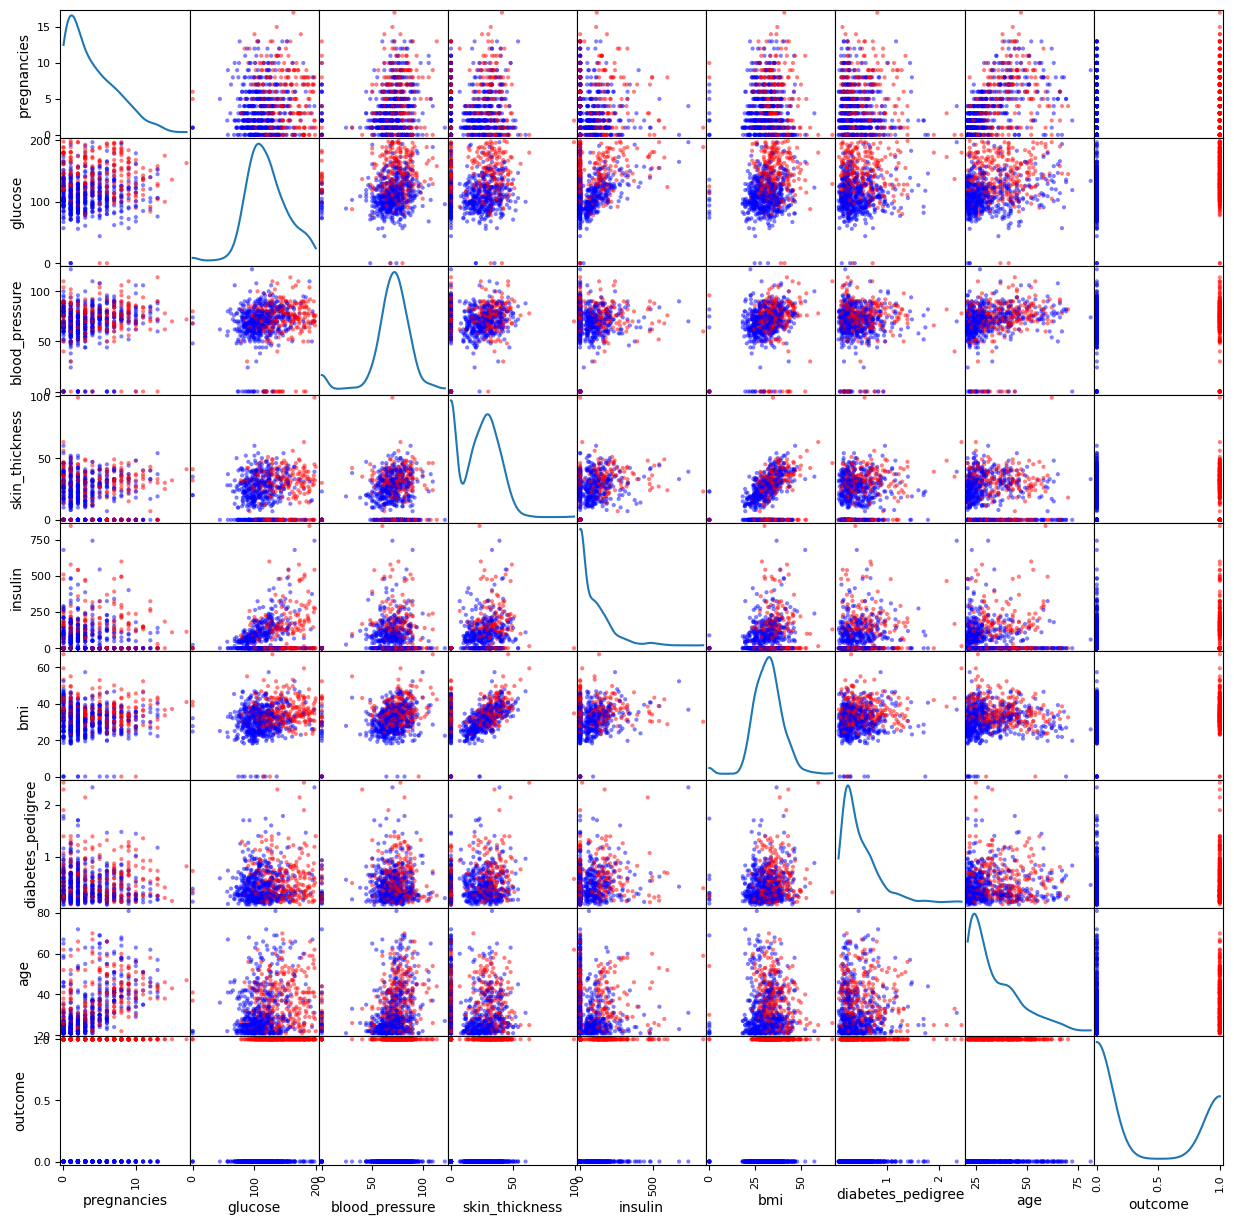

In [10]:
from pandas.plotting import scatter_matrix
color_map = df["outcome"].map({0: "Blue", 1: "Red"})
scatter_matrix(df, figsize=(15, 15), c=color_map, diagonal="kde", alpha=0.5)
plt.show()

One of the most noticeable patterns is in the Outcome column, where the red (diabetic) and blue (non-diabetic) points are completely separated along both the horizontal and vertical axes. This indicates that the model should be able to distinguish between the two classes based on the available features. Among the features, Glucose shows the strongest separation, with higher glucose levels being associated with diabetes. However, features like Insulin, Blood Pressure, and Skin Thickness do not show a strong distinction between diabetic and non-diabetic individuals, which could mean they are less useful for classification.

## **Spliting Data**
We will need to split our data into train and testing using the train_test_split function so the model to pick up trends and make predictions. Our data will contain everthing from the dataset, except for the last column which is our target value ('outcome'). The parameter 'test_size' wil be set to 0.20 so we can have a 80/20 split for our traing and testing sets.

In [11]:
from sklearn.model_selection import train_test_split

X=df.iloc[:, 1:]
y=df['outcome']

X_train, X_test, t_train, t_test = train_test_split(X, y, test_size=0.20)

print("Train data shape: {}".format(X_train.shape))
print("Train target shape: {}".format(t_train.shape))
print("Test data shape: {}".format(X_test.shape))
print("Test target shape: {}".format(t_test.shape))

Train data shape: (614, 8)
Train target shape: (614,)
Test data shape: (154, 8)
Test target shape: (154,)


## **Training the Models**
Next, we can train the first model, which will be a Decision Tree. For now, we will only use a single hyperparameter (random_state=0) for all the models we train. This parameter ensures that we get the same results every time we run the cell and train the model. Finally we can use 'score' to find the train and test scores from our model.

The way a Decision Tree works is by splitting the data into smaller subsets based on the most important features, forming a tree structure of decisions. Each node represents a question about the data, and each branch leads to different possible outcomes. I chose to use the Decision Tree because they are mainly used for classification problems like predicting whether a patient has diabetes.

In [17]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, t_train)

train_score = dt_model.score(X_train, t_train)
test_score = dt_model.score(X_test, t_test)

print(f"Train Accuracy: {train_score}\nTest Accuracy: {test_score}\n")

Train Accuracy: 1.0
Test Accuracy: 1.0



The results show that the Decision Tree model achieved 1.0 accuracy on both the training and test sets. This means the model was able to perfectly predict whether a patient was diabetic or not. These results suggest that the features do a very good job of predicting the outcome, but I still want to test another model to see if there is any difference. Overfitting is a common issue with Decision Trees, and many use Random Forests to address this by combining multiple decision trees to reduce overfitting and improve generalization. Next, we will train a Random Forest model to see if we achieve similar results.

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, t_train)

train_score = rf_model.score(X_train, t_train)
test_score = rf_model.score(X_test, t_test)

print(f"Train Accuracy: {train_score}\nTest Accuracy: {test_score}\n")

Train Accuracy: 1.0
Test Accuracy: 1.0



The Random Forest model achieved the same 1.0 accuracy as the Decision Tree, confirming that the dataset is very easy to classify. While the results are already perfect, we can still explore hyperparameter tuning to optimize the model for future scenarios where the dataset might be updated with more challenging cases. Manually selecting hyperparameters is possible, but there is many to choose from. Instead of manually guessing which hyperparameters to adjust, we can use GridSearchCV to see the best values for each parameter.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

All the possible hyperparameters in the RandomForestClassifier can be found in the scikit-learn documentation:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

The hyperparameters we will focus on are:

- **criterion** – Function to measure the quality of a split.
- **max_depth** – Maximum depth of each tree.
- **min_samples_split** – Minimum samples required to split a node.
- **min_samples_leaf** – Minimum samples required at a leaf node.
- **max_leaf_nodes** – Maximum number of leaf nodes per tree.
  

In [16]:
from sklearn.model_selection import GridSearchCV

# Hyper-parameters that will be search for the best value
hyper_parameters = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [3, 5, 10, 15],
    "min_samples_split": [2, 3, 5, 10],
    "min_samples_leaf": [1, 2, 3, 4],
    "max_leaf_nodes": [2, 5, 10, 15]
}

grid_search = GridSearchCV(rf_model, hyper_parameters)
grid_search.fit(X_train, t_train)
best_params = grid_search.best_params_


print(f"Best params: {best_params}")

Best params: {'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In the code above we use the GridSearchCV() to find the best possible values from a dictionary that contains possible values for the parameters. After fitting the train data to the grid search, we printed the best_params function to see the best parameters. Now we will retrain the random forest model but this time use these parameters.

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Now we are using more parameters which should help improve the model
rf_model = RandomForestClassifier(
    random_state=0,
    criterion='gini',
    max_depth=3,
    max_leaf_nodes=5,
    min_samples_leaf=1,
    min_samples_split=2
)

rf_model.fit(X_train, t_train)

train_score = rf_model.score(X_train, t_train)
test_score = rf_model.score(X_test, t_test)

print(f"Train Accuracy: {train_score}\nTest Accuracy: {test_score}\n")

Train Accuracy: 1.0
Test Accuracy: 1.0



## **Evaluation & Challenge**

We can now use the classification_report function to look at different metrics about our model to get a better evaluation and understanding of how its performing.

In [19]:
from sklearn.metrics import classification_report

y_pred = rf_model.predict(X_test)

print(classification_report(t_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00        55

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



As expected, the classification report confirms that our newly trained Random Forest model got a perfect score of 1.00 accuracy. Also, it performed perfectly on other key metrics such as F1-score, recall, and both weighted and macro averages.

- Precision measures how many of the predicted positive cases were actually positive. Since it is 1.00, it means that every patient predicted as diabetic was truly diabetic.

- Recall measures how many of the actual positive cases were correctly identified. A score of 1.00 means that the model successfully identified all diabetic patients without missing any.

- F1-score is the mean of precision and recall. Since both values are 1.00, the F1-score is also 1.00, meaning the model is perfectly balanced between precision and recall.

Since our original models (Decision Tree and Random Forest without tuning) also performed perfectly, it is difficult to gauge whether hyperparameter tuning actually improved the model. However, using GridSearchCV was still useful because the model is prepared for cases where future datasets might contain more challenging or harder to distinguish patients.

## **Findings & Storytelling**


#### Which Classification Model Performs Better?

Both the Decision Tree and Random Forest models achieved perfect accuracy 1.00 on both the training and test sets. This means that the dataset is very easy to classify. Most  datasets are not as clean and models struggle with generalization, but this dataset appears to have clear distinctions between diabetic and non-diabetic patients. This made it challenging to see results and neither model outperformed the other. However, in most cases Random Forest is generally preferred over Decision Trees due to its ability to reduce overfitting by combining multiple trees for a better prediction. I came in with the impression that decision tree would preform decently well and random forest would do much better but this dataset was too easy for the models to tell any difference.

#### Can Hyperparameter Tuning Improve the Model?

Since both models already achieved perfect accuracy, tuning hyperparameters did not lead to any noticeable improvements in performance. However, GridSearchCV was still valuable, because it ensures that the model is ready for scenarios where the dataset may become more challenging in the future. If there are more cases where patients have some confusing indicators or missing data, the parameter tuning could prevent overfitting and make the model more reliable. The best parameters found for the Random Forest model suggest that a shallower tree depth (max_depth=3) and less leaf nodes (max_leaf_nodes=5) were the best for classification. This means that the dataset does not require deep decision structures.

## **Impact**

Early detection of diabetes is crucial because it allows for lifestyle changes and medical treatments that can prevent severe complications. These models where able to predict perfectly and if they were implemented in healthcare, it could help doctors identify high risk patients quicker, giving the patients a more enjoyable way of life.

However, if these models are implemented in health care, they could have a negative impact because it had success on an overly simple dataset. This might not make accurate predictions when faced with the complex data of a real patient, which often includes missing values, borderline cases, or other diseases with overlapping symptoms.

One of the impacts for other's trying to train models is learning how to pick the best parameter efficently. Many people assume that their first trained model is the best possible version, but by using GridSearchCV, we can develop models that are better suited for future complex data.